## map2loop Fetching grav/mag grids (modified from example in geophys_utils by Alex Ip)
https://github.com/GeoscienceAustralia/geophys_utils

In [1]:
%matplotlib inline

In [2]:
import os
import netCDF4
import numpy as np
from geophys_utils import NetCDFGridUtils
from geophys_utils import get_netcdf_edge_points, points2convex_hull
import matplotlib.pyplot as plt

In [3]:
# Open mag tmi vrtp netCDF4 Dataset
netcdf_path = "http://dapds00.nci.org.au/thredds/dodsC/rr2/national_geophysical_compilations/magmap_v6_2015_VRTP/magmap_v6_2015_VRTP.nc"

netcdf_dataset = netCDF4.Dataset(netcdf_path, 'r')
print(type(netcdf_dataset))
max_bytes = 500000000

netcdf_grid_utils = NetCDFGridUtils(netcdf_dataset)
#netcdf_grid_utils.__dict__
netcdf_dataset.variables.keys()

<class 'netCDF4._netCDF4.Dataset'>
('lat', 'lon')
[<class 'netCDF4._netCDF4.Variable'>
float32 mag_tmi_rtp_anomaly(lat, lon)
    units: nT
    long_name: magnetic_total_magnetic_intensity_reduced_to_pole_anomaly
    grid_mapping: crs
    actual_range: [-42806.832  66324.53 ]
    _FillValue: -99999.0
    _ChunkSizes: [128 128]
unlimited dimensions: 
current shape = (41882, 50591)
filling off]


dict_keys(['lat', 'crs', 'lon', 'mag_tmi_rtp_anomaly'])

(1200, 1200)


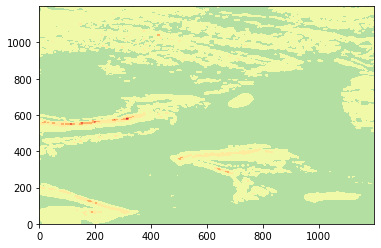

In [4]:
lats = netcdf_dataset.variables['lat'][:]
lons = netcdf_dataset.variables['lon'][:]
latselect = np.logical_and(lats>-23,lats<-22)
lonselect = np.logical_and(lons>117,lons<118)
data = netcdf_dataset.variables['mag_tmi_rtp_anomaly'][latselect,lonselect]
print(data.shape)

plt.contourf(data[::-1],cmap ='Spectral_r') # flip latitudes so they go south -> north
plt.show()

In [5]:
# Open grav netCDF4 Dataset

netcdf_path = "http://dapds00.nci.org.au/thredds/dodsC/rr2/national_geophysical_compilations/IR_gravity_anomaly_Australia_V1/IR_gravity_anomaly_Australia_V1.nc"
netcdf_dataset = netCDF4.Dataset(netcdf_path, 'r')
print(type(netcdf_dataset))
max_bytes = 500000000

netcdf_grid_utils = NetCDFGridUtils(netcdf_dataset)
#netcdf_grid_utils.__dict__
netcdf_dataset.variables.keys()

<class 'netCDF4._netCDF4.Dataset'>
('lat', 'lon')
[<class 'netCDF4._netCDF4.Variable'>
float32 grav_ir_anomaly(lat, lon)
    actual_range: [-1286.085   1207.9459]
    units: um/s^2
    long_name: gravity_isostatic_residual_anomaly
    grid_mapping: crs
    _FillValue: -99999.0
    _ChunkSizes: [128 128]
unlimited dimensions: 
current shape = (4182, 5717)
filling off]


dict_keys(['lon', 'lat', 'crs', 'grav_ir_anomaly'])

(120, 120)


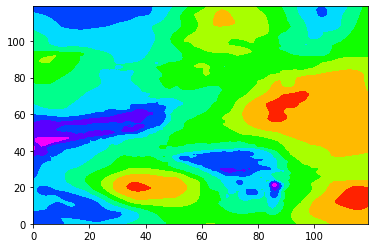

In [6]:
lats = netcdf_dataset.variables['lat'][:]
lons = netcdf_dataset.variables['lon'][:]
latselect = np.logical_and(lats>-23,lats<-22)
lonselect = np.logical_and(lons>117,lons<118)
data = netcdf_dataset.variables['grav_ir_anomaly'][latselect,lonselect]
print(data.shape)

plt.contourf(data[::-1],cmap ='gist_rainbow') # flip latitudes so they go south -> north
plt.show()